<a href="https://colab.research.google.com/github/deelilah/HR-Promotion/blob/main/TM_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- PROJECT LOGO -->
<br />
<p align="center">
  <a href="https://moringaschool">
    <img src="https://user-images.githubusercontent.com/14905480/89539811-e57f1080-d804-11ea-892e-ca6888a2f60b.png" alt="Logo" width="80" height="80">
  </a>

  <h2 align="center">TM Assessment Presentation</h2>


  <p align="center">
    Multivariate Analysis Technique
    <br/> Compiled by Rose Delilah Gesicho
    <br />
    <br />
    <br />
    <a href="https://drive.google.com/file/d/1QchPIownzb10MlWCR40nCOHDSVCCzfhJ/view?usp=sharing">View Dataset</a>
    •
    <a href="https://github.com/deelilah/HR-Promotion">Github</a>
    •
    <a href="https://moringaschool.com">Moringa School</a>
  </p>
</p>

#MULTIVARIATE ANALYSIS TECHNIQUE





## Assessment Question

<font color="green">Implementation</font>

### 1. Defining the Question

 a) Specifying the Question

This is the analysis of factors that contribute to an individual getting promoted.It will focus on multivariate analysis.


#### b) Defining the Metric for Success

The analysis will focus on multivariate analysis techniques.

#### c) Understanding the context 

A large MNC has 9 broad verticals across the organization. One of the problems is identifying the right people for promotion (only for manager position and below) and preparing them in time. The final promotions are only announced after the evaluation and this leads to delay in transition to new roles. Hence, the company needs help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.






#### d) Recording the Experimental Design


Below is the expected flow of the work:

- Data Cleaning and Preparation
    - Load libraries and dataset
    - Deal with missing values
    - Deal with duplicated records
- Perform EDA
    - Univariate Analysis
    - Bivariate Analysis
    -Multivariate Analysis

#### e) Data relevance / Appropriateness of Data


   
*  ememployee_id: Unique ID for employee

* department: Department of employee

* region: Region of employment (unordered)

* education: Education Level

* gender: Gender of Employee

* recruitment_channel: Channel of recruitment for employee

* no of trainings: no of other trainings completed in previous year on soft skills, technical skills etc.

* age: Age of Employee

* previous year rating: Employee Rating for the previous year

* length of service: Length of service in years

* awards_ won: if awards won during previous year then 1 else 0

* avg training score: Average score in current training evaluations

* is_promoted: (Target: 1=Promoted, 0=Not Promoted) Recommended for promotion



Importing libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/TM Position Assessment - Rose Delilah/Dataset on HR Promotion/train.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


###Data Understanding

In [ ]:
# number of records in the dataset
df.shape

(54808, 13)

In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [ ]:
#convert datatype correctly
df['employee_id']=df['employee_id'].astype(int).astype('str')


In [ ]:
df['is_promoted']=df['is_promoted'].astype(int).astype('category')

In [ ]:
df['awards_won?']=df['awards_won?'].astype(int).astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   employee_id           54808 non-null  object  
 1   department            54808 non-null  object  
 2   region                54808 non-null  object  
 3   education             52399 non-null  object  
 4   gender                54808 non-null  object  
 5   recruitment_channel   54808 non-null  object  
 6   no_of_trainings       54808 non-null  int64   
 7   age                   54808 non-null  int64   
 8   previous_year_rating  50684 non-null  float64 
 9   length_of_service     54808 non-null  int64   
 10  awards_won?           54808 non-null  category
 11  avg_training_score    54808 non-null  int64   
 12  is_promoted           54808 non-null  category
dtypes: category(2), float64(1), int64(4), object(6)
memory usage: 4.7+ MB


In [ ]:
# Checking for null values

df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
#impute with mode for the missing values
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])


In [ ]:
# Checking duplicate values

df.duplicated().any()

False

In [ ]:
#Drop columns not in use
df_new=df.drop('employee_id', axis = 1)
df_new.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


Check for outliers

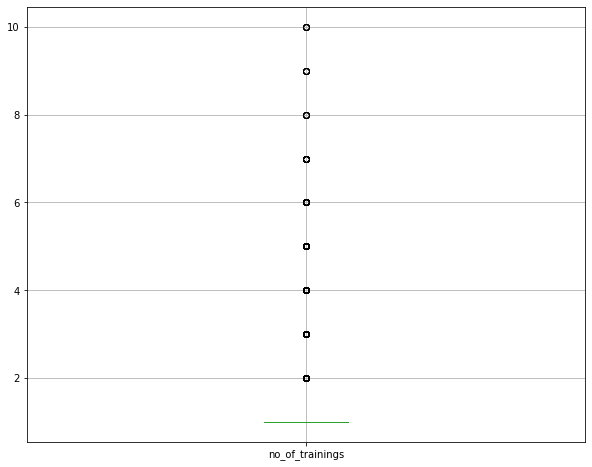

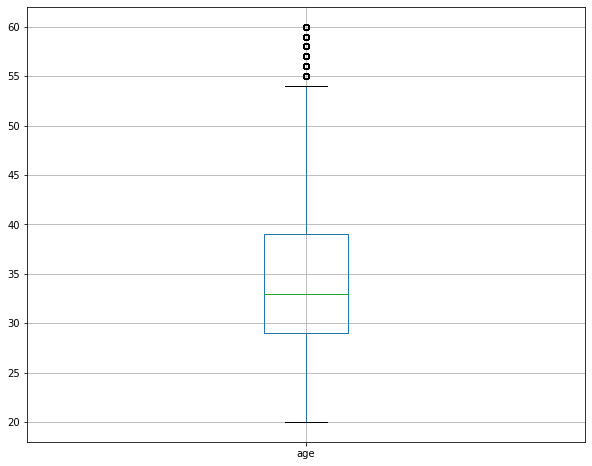

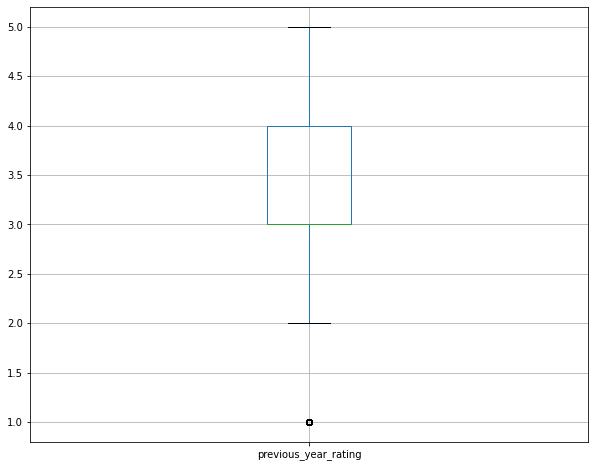

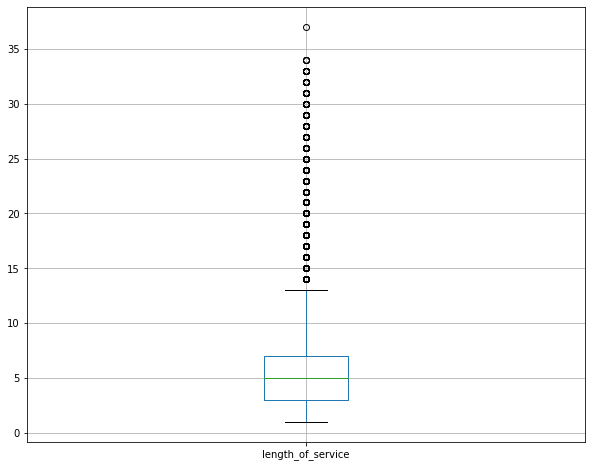

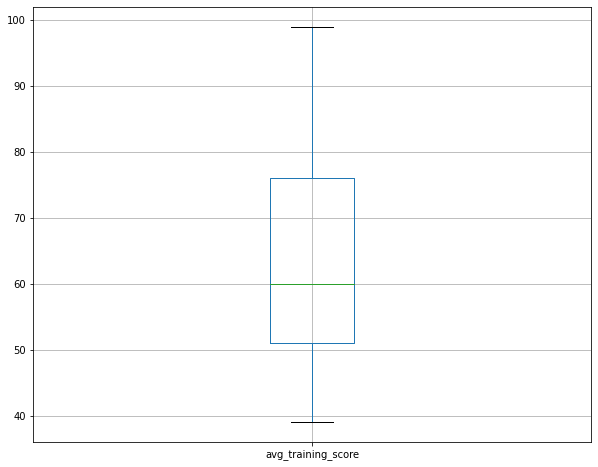

In [ ]:
num_cols = df_new.select_dtypes('number').columns

for col in num_cols:
  plt.figure(figsize = (10, 8))
  df.boxplot([col])

There is presence of outliers for variables age,length of service and no of trainings.The outliers are significant as they are a representation of real world situation

#Exploratory Data Analysis


###Univariate Analysis


In [ ]:
# measures of central tendency
for i in ['avg_training_score', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service']:
  print(f"For column {i}")
  print("Mean: ", df_new[i].mean())
  print("Mode: ", df_new[i].mode())
  print("Median: ", df_new[i].median())
  print("===========================================")

For column avg_training_score
Mean:  63.38675010947307
Mode:  0    50
dtype: int64
Median:  60.0
For column no_of_trainings
Mean:  1.253010509414684
Mode:  0    1
dtype: int64
Median:  1.0
For column age
Mean:  34.80391548679025
Mode:  0    30
dtype: int64
Median:  33.0
For column previous_year_rating
Mean:  3.3044810976499783
Mode:  0    3.0
dtype: float64
Median:  3.0
For column length_of_service
Mean:  5.865512333965844
Mode:  0    3
dtype: int64
Median:  5.0


In [ ]:
# measures of dispersion

for x in ['avg_training_score', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service']:
  print(f"For column {x}")
  print("Skewness: ", df_new[x].skew())
  print("Kurtosis: ", df_new[x].kurt())
  print("Variance: ", df_new[x].var())
  print("Standard Deviation: ", df[x].std())
  print("=" * 40)

For column avg_training_score
Skewness:  0.45190808551707995
Kurtosis:  -1.049649301934108
Variance:  178.798603425308
Standard Deviation:  13.371559498626478
For column no_of_trainings
Skewness:  3.445433937567454
Kurtosis:  18.74008184650997
Variance:  0.3712026432013709
Standard Deviation:  0.609264017648647
For column age
Skewness:  1.0074317710382241
Kurtosis:  0.7923533691940756
Variance:  58.67819219692497
Standard Deviation:  7.660169201585887
For column previous_year_rating
Skewness:  -0.2608580288123413
Kurtosis:  -0.5928105773788475
Variance:  1.4756658719220315
Standard Deviation:  1.2147698843493082
For column length_of_service
Skewness:  1.738061458740809
Kurtosis:  4.414031376098643
Variance:  18.19102836159372
Standard Deviation:  4.2650941796862725


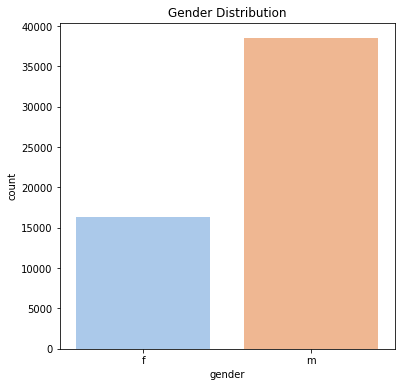

In [ ]:
# Value counts of gender in the dataset

plt.figure(figsize=(6,6))
sns.countplot(x='gender', data=df_new, palette='pastel')
plt.title('Gender Distribution')
plt.show()

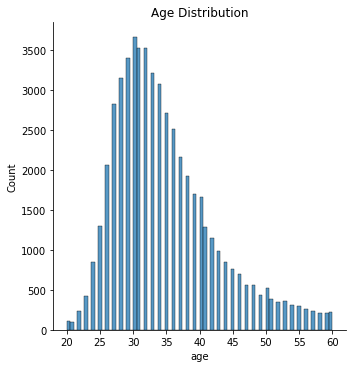

In [ ]:
# Value counts of age in the dataset

sns.displot(data=df_new, x='age', kind='hist', palette='Set2')
plt.title('Age Distribution')
plt.show()

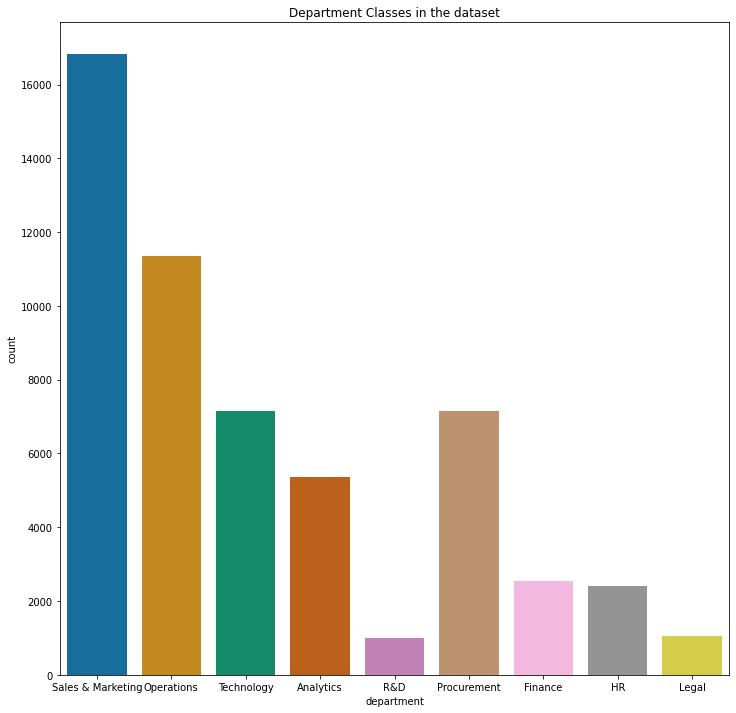

In [ ]:
# Department classes in the dataste

plt.figure(figsize=(12, 12))
sns.countplot(x='department', data=df_new, palette='colorblind')
plt.title('Department Classes in the dataset')
plt.show()

The most department prone for promotion is Sales and Marketing

###Bivariate Analysis

<Figure size 864x720 with 0 Axes>

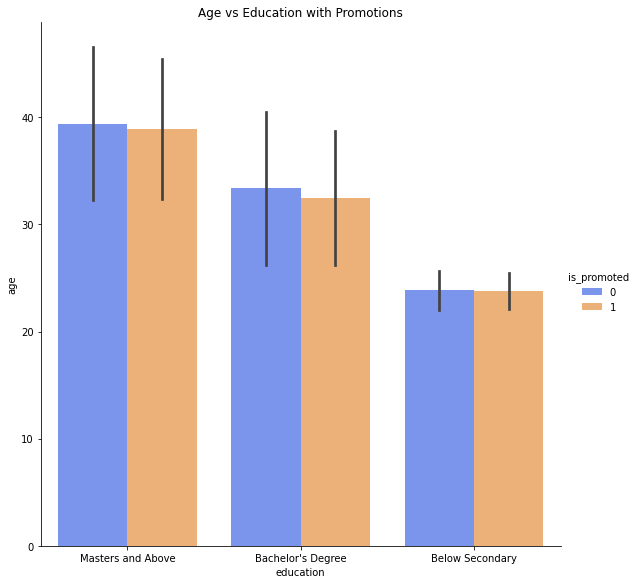

In [ ]:
# Relationship between Education, age and Promotions
plt.figure(figsize=(12,10))
sns.catplot(x='education', y='age', hue='is_promoted', data=df_new, kind='bar',
            palette='bright', ci='sd', alpha=.6, height=8)
plt.xticks(ticks=[0,1,2], labels=['Masters and Above', "Bachelor's Degree", "Below Secondary"])
plt.title("Age vs Education with Promotions")
plt.show()

Most of those who were promoted had masters and above compared to other education levels


<Figure size 576x576 with 0 Axes>

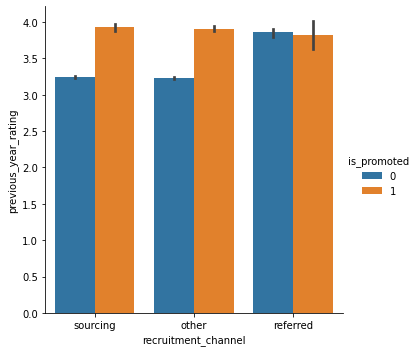

In [ ]:
# Relationship between Recruitment channels, Previous year ratings and Promotions

plt.figure(figsize=(8,8))
sns.catplot(x='recruitment_channel', y='previous_year_rating', data=df_new, hue='is_promoted', kind='bar')
plt.show()

From this analysis we can see those highly promoted come from Sourcing instead pf referred


###Multivariate Analysis

Multivariate analysis refers to all statistical techniques that simultaneously analyze
multiple measurements on individuals or objects under investigation. Thus, any simultaneous analysis of more than
two variables can be loosely considered multivariate analysis.


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

df1=df_new.apply(LabelEncoder().fit_transform)
df1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,0,15,4,7,0,10,0
1,4,14,0,1,0,0,10,4,3,0,21,0
2,7,10,0,1,2,0,14,2,6,0,11,0
3,7,15,0,1,0,1,19,0,9,0,11,0
4,8,18,0,1,0,0,25,2,1,0,34,0


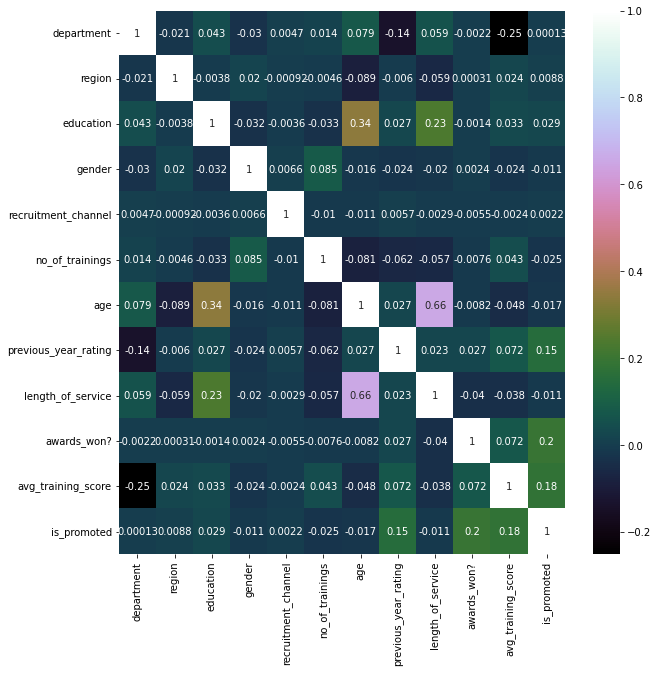

In [ ]:
# A heatmap inspecting correlations between variables in the dataset

plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), cmap='cubehelix', annot=True)
plt.show()

In [ ]:
# Separating features and target variables

X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

In [ ]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Features,VIF
6,age,8.09
8,length_of_service,4.06
7,previous_year_rating,3.92
0,department,3.89
10,avg_training_score,3.67
1,region,3.55
3,gender,3.04
4,recruitment_channel,1.73
2,education,1.58
5,no_of_trainings,1.19


Age and length of service have high multicollinearity. I wont drop the variable yet as I want to identify of what importance are they.

VIF > 5 symbolises high multicollinearity





####Discriminant Analysis

In [ ]:
#standardize my data before using LDA so that it has a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:

# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()

lda_= lda.fit(X,y)
lda_feat = lda_.transform(X)

# Display the coeficients of the reducted columns
lda_.coef_

array([[ 1.01926230e-01,  2.03654144e-03,  1.11502696e-01,
         4.54802797e-03,  8.01500870e-03, -1.56716211e-01,
        -1.72961074e-02,  4.64520363e-01,  1.01821341e-02,
         4.70494428e+00,  5.09838017e-02]])

In [ ]:
# Matching the coeeficients to their variables
df2= pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
df2.sort_values(0, ascending=False)

,0
awards_won?,4.704944
previous_year_rating,0.464520
education,0.111503
department,0.101926
avg_training_score,0.050984
length_of_service,0.010182
recruitment_channel,0.008015
gender,0.004548
region,0.002037
age,-0.017296


##Insights and Recommendations




From the selection of the multivariate technique used:
LDA was adopted due to the type of data we are addressing. This is a supervised ML challenge where we have our target variable as a category. 
The aim of using LDA was for it to perform feature reduction from our 13 features to identify which one contributes more to our target variable.

We didnt have high correlation within our independent variables.
From the LDA we have features highly contributing to ones promotion under awards_won,previous_year_rating,education,department,avg_training_score,length_of_service

We can also try other approaches like Random Forest or Regularization techniques to compare feature selected.